In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [4]:
import networkit as nk
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import random
import phate

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from IPython.display import display, Math, Latex, Markdown
from tqdm.notebook import tqdm

from External.ICT.calculate_ICT import calculate_ICT
from External.clustering import centers, k_means_pp, ICT_clusters, cfilter, cassign
from External.generation import create_graph, find_backbone
from External.plotting import plot_points, plot_graph, no_intersections
from External.reweight import reweight_clusters

from copy import deepcopy

# from External.create_k_nearest import patch_together

plt.style.use('standard.mplstyle')

In [5]:
# Hyperparameters
mode = "K_Nearest" # Graph construction mode
ICT_algorithm = "cluster_all"
metric = "euclidean" # metric for clustering

# Cluster rassignment
min_cluster_size = 12
small_behavior = "reassign" #reassign or remove

In [6]:
position, labels = phate.tree.gen_dla(n_dim=2, n_branch=3,
                                            branch_length=2500, rand_multiplier=2, seed=37, sigma=1)
position = StandardScaler().fit_transform(position)
number_of_nodes = len(position)

In [7]:
old_G, _ = create_graph(number_of_nodes, mode, position=position)
old_G.indexEdges()

G, _ = create_graph(number_of_nodes, "Delaunay", position=position)
G.indexEdges()

Final k: 11


In [8]:
cluster_centers2 = centers(position)
old_ICT = calculate_ICT(old_G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
old_ICT.indexEdges()
ICT = calculate_ICT(G, algorithm_type=ICT_algorithm, cluster_centers=cluster_centers2, zeros_stay_zeros=True, update_G=1.1)
ICT.indexEdges()

create edgeId array:   0%|          | 0/48410 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/48410 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/7499 [00:00<?, ?it/s]

create edgeId array:   0%|          | 0/22478 [00:00<?, ?it/s]

Calculate the lower bound for the weights:   0%|          | 0/22478 [00:00<?, ?it/s]

Iteration over all nodes:   0%|          | 0/7499 [00:00<?, ?it/s]

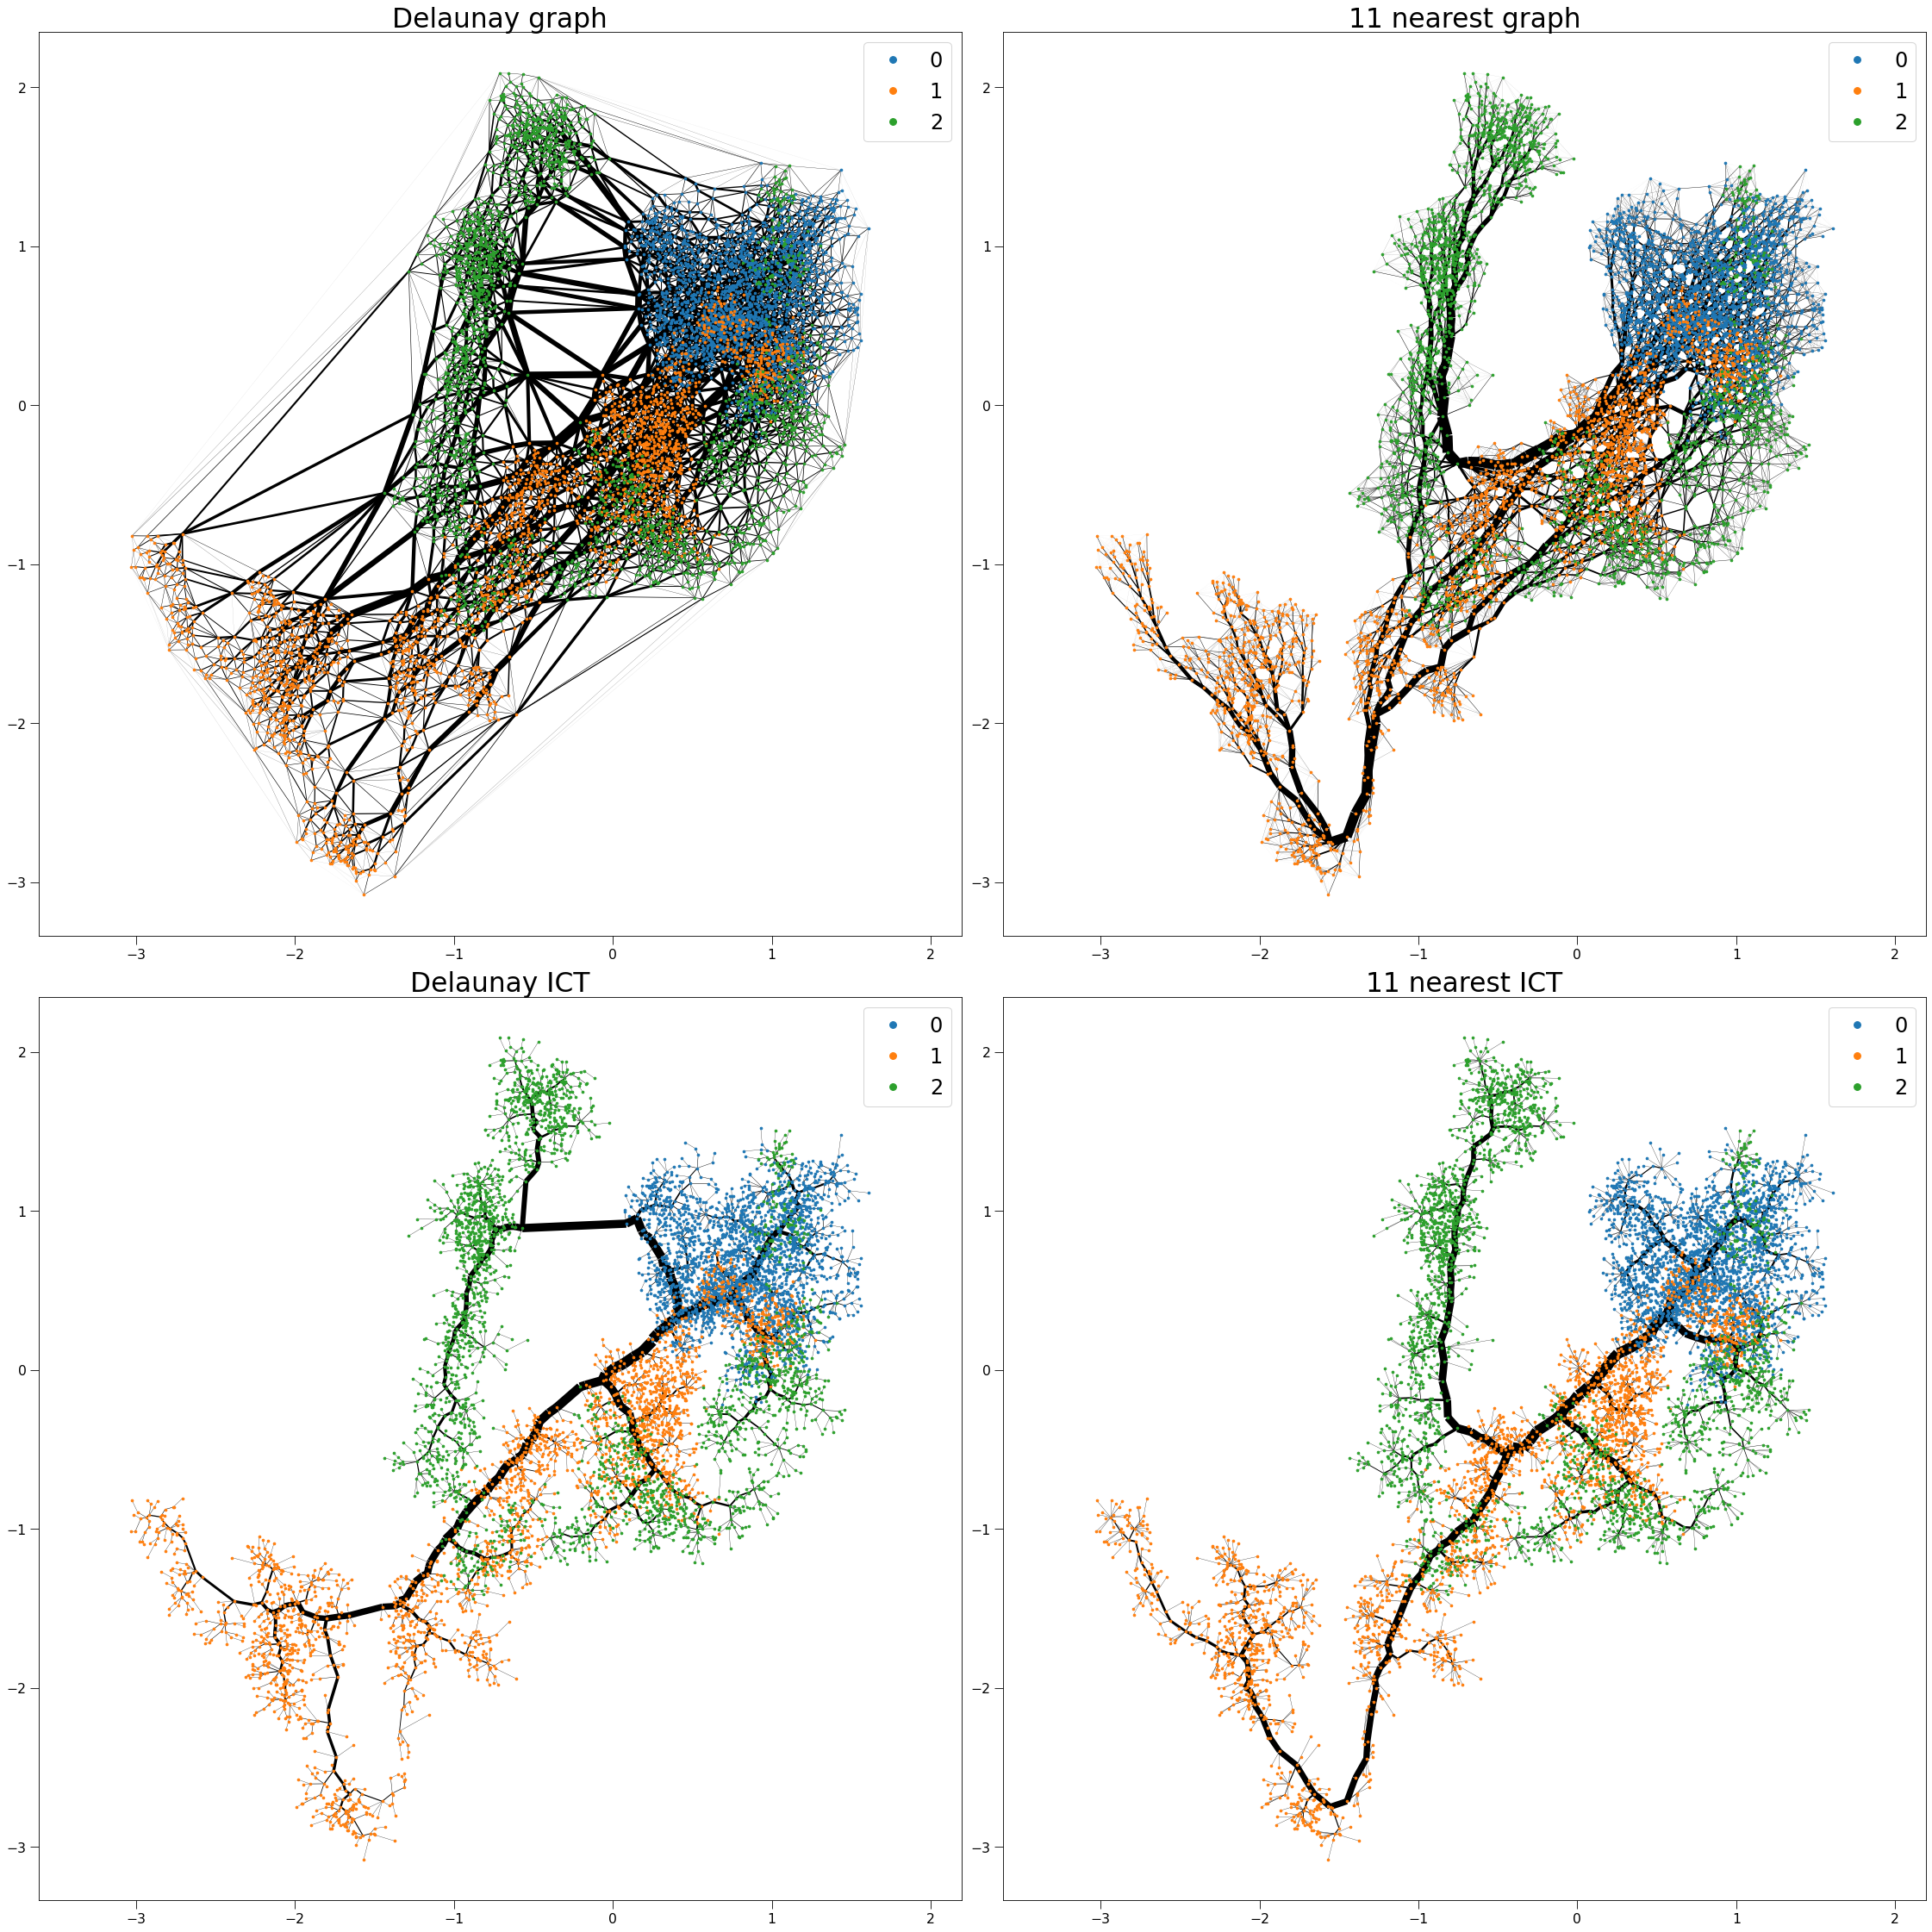

In [9]:
fig, ax = plt.subplots(2,2, figsize=(30, 30))
plot_points(position, "", ax[0,0], labels=labels, node_size=5)
plot_graph(G, position, "Delaunay graph", ax[0,0], node_size=0)
plot_points(position, "", ax[0,1], labels=labels, node_size=5)
plot_graph(old_G, position, "11 nearest graph", ax[0,1], node_size=0)


plot_points(position, "", ax[1,0], labels=labels, node_size=5)
plot_graph(ICT, position, "Delaunay ICT", ax[1,0], node_size=0)
plot_points(position, "", ax[1,1], labels=labels, node_size=5)
plot_graph(old_ICT, position, "11 nearest ICT", ax[1,1], node_size=0)

ax[0,0].legend(markerscale=3)
ax[0,1].legend(markerscale=3)
ax[1,0].legend(markerscale=3)
ax[1,1].legend(markerscale=3)

plt.tight_layout()
plt.savefig("./Output/knn_vs_delaunay.png")
plt.show()